In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import copy, math

In [2]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')
x = data.iloc[: , 0:6]
y = data.iloc[: , 6]

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
#Checking our data and make sure that no missing values there :)
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [5]:
print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
print(data.tail())


      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


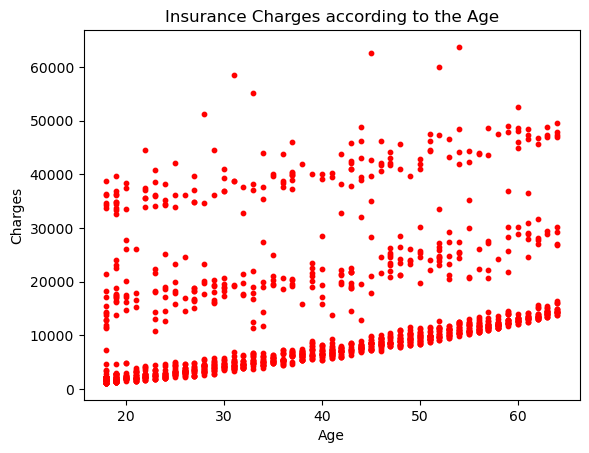

In [7]:
#Insurance Charges according to the Age
plt.scatter(x.iloc[: , 0], y,c='r',s=10)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Insurance Charges according to the Age')
plt.show()

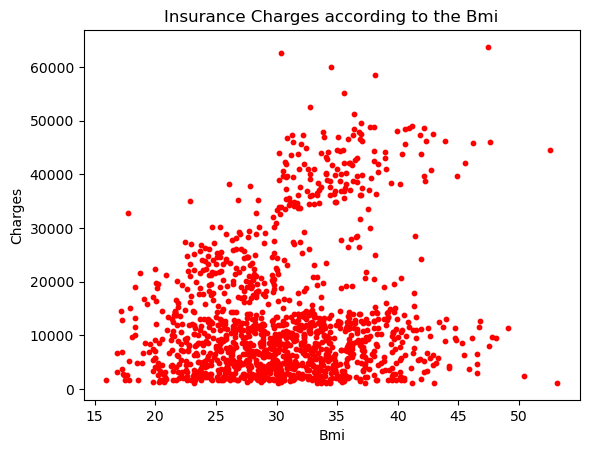

In [8]:
#Insurance Charges according to the Bmi
plt.scatter(x.iloc[: , 2], y,c='r',s=10)
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.title('Insurance Charges according to the Bmi')
plt.show()

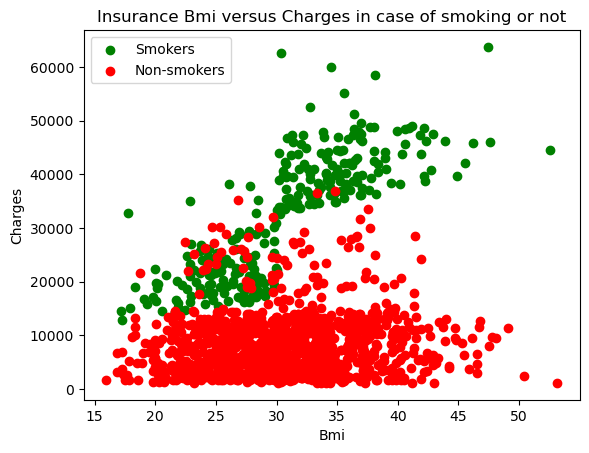

In [9]:
#Insurance Bmi versus Charges in case of smoking or not
df_smoker = data[data['smoker'] == 'yes']
df_nonsmoker = data[data['smoker'] == 'no']
plt.scatter(df_smoker.bmi, df_smoker.charges, label = 'Smokers', color = 'green')
plt.scatter(df_nonsmoker.bmi, df_nonsmoker.charges, label = 'Non-smokers', color = 'red')
plt.title('Insurance Bmi versus Charges in case of smoking or not')
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.legend()
plt.show()

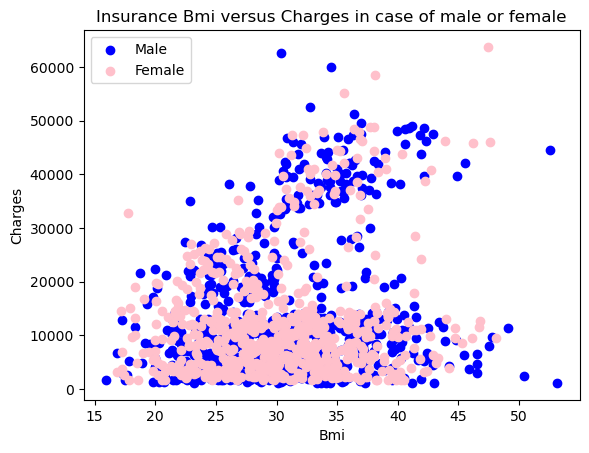

In [10]:
#Insurance Bmi versus Charges in case of male or female
df_male = data[data['sex'] == 'male']
df_female = data[data['sex'] == 'female']
plt.scatter(df_male.bmi, df_male.charges, label = 'Male', color = 'blue')
plt.scatter(df_female.bmi, df_female.charges, label = 'Female', color = 'pink')
plt.title('Insurance Bmi versus Charges in case of male or female')
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.legend()
plt.show()

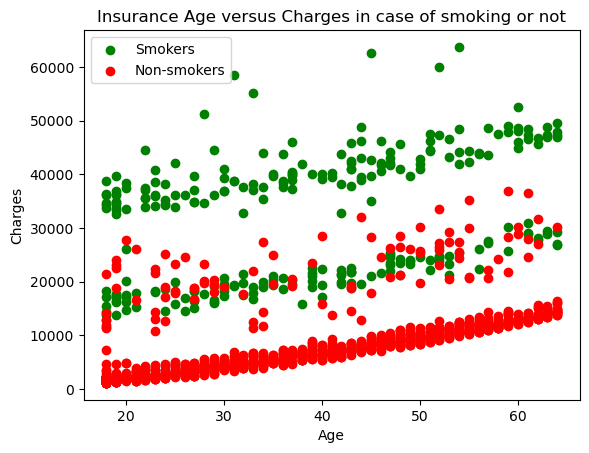

In [11]:
#Insurance Age versus Charges in case of smoking or not
df_smoker = data[data['smoker'] == 'yes']
df_nonsmoker = data[data['smoker'] == 'no']
plt.scatter(df_smoker.age, df_smoker.charges, label = 'Smokers', color = 'green')
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges, label = 'Non-smokers', color = 'red')
plt.title('Insurance Age versus Charges in case of smoking or not')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()


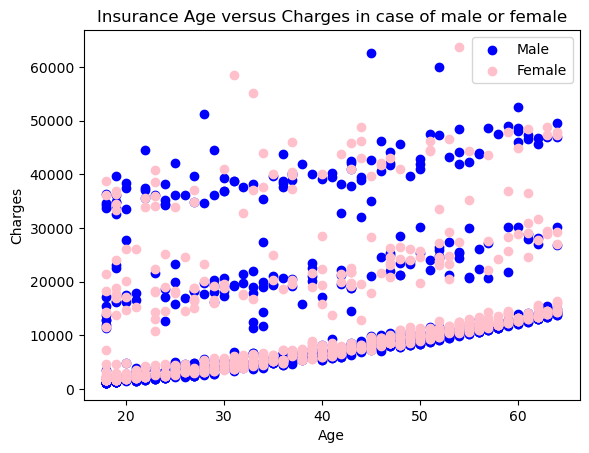

In [12]:
#Insurance Age versus Charges in case of male or female
df_male = data[data['sex'] == 'male']
df_female = data[data['sex'] == 'female']
plt.scatter(df_male.age, df_male.charges, label = 'Male', color = 'blue')
plt.scatter(df_female.age, df_female.charges, label = 'Female', color = 'pink')
plt.title('Insurance Age versus Charges in case of male or female')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

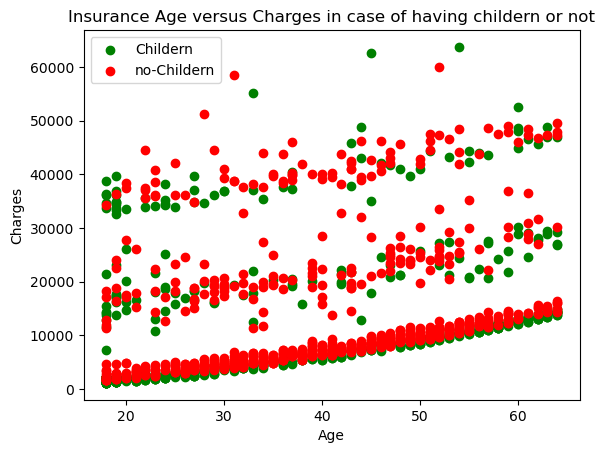

In [13]:
#Insurance Age versus Charges in case of having childern or not
df_male = data[data['children'] == 0]
df_female = data[data['children'] != 0 ]
plt.scatter(df_male.age, df_male.charges, label = 'Childern', color = 'green')
plt.scatter(df_female.age, df_female.charges, label = 'no-Childern', color = 'red')
plt.title('Insurance Age versus Charges in case of having childern or not')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

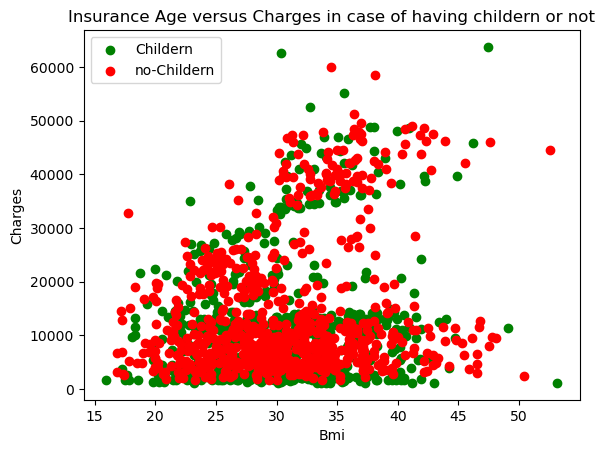

In [14]:
#Insurance Age versus Charges in case of having childern or not
df_male = data[data['children'] == 0]
df_female = data[data['children'] != 0 ]
plt.scatter(df_male.bmi, df_male.charges, label = 'Childern', color = 'green')
plt.scatter(df_female.bmi, df_female.charges, label = 'no-Childern', color = 'red')
plt.title('Insurance Age versus Charges in case of having childern or not')
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.legend()
plt.show()

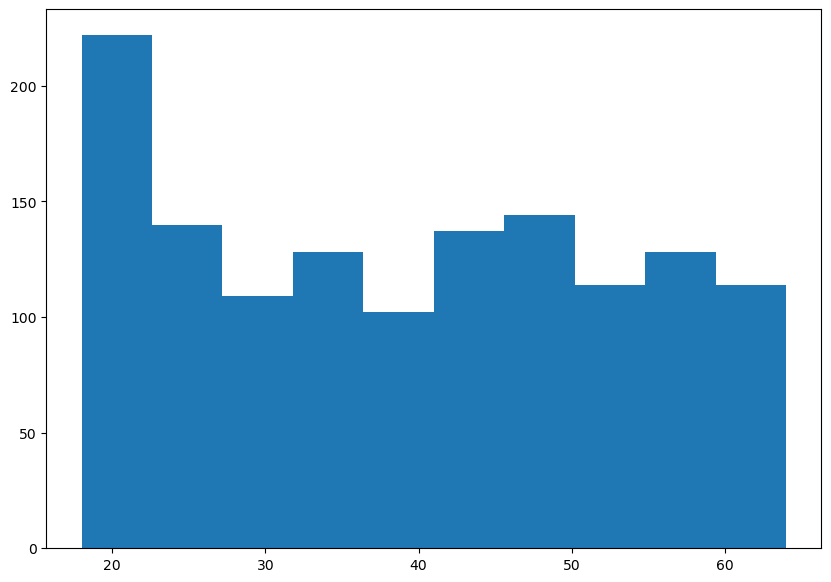

In [15]:
#Histogram for Age frequencies 
a = data.iloc[: , 0]
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a)
plt.show()

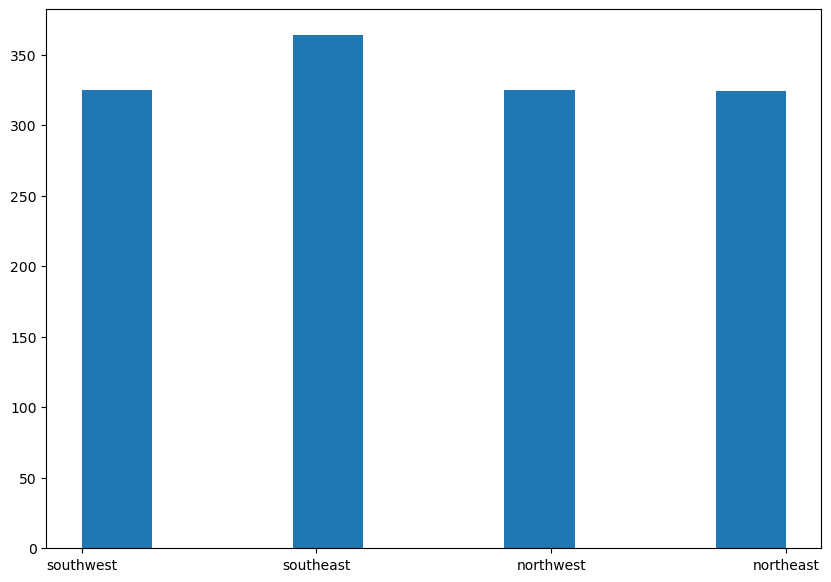

In [16]:
#Histogram for Region frequencies 
b = data.iloc[: , 5]
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(b)
plt.show()

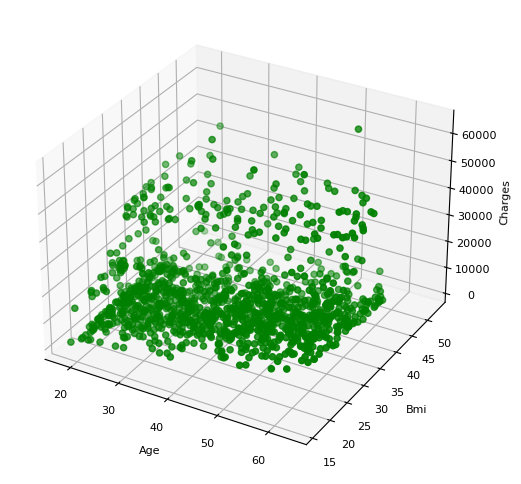

In [17]:
from mpl_toolkits.mplot3d import Axes3D
font = {'size' : 8}
plt.rc('font', **font)
fig = plt.figure(figsize=(6,12))
ax = fig.add_subplot(111, projection='3d')
#three_d_plot = Axes3D(fig)
ax.scatter(data.age, data.bmi, data.charges, color = 'green')
ax.set_xlabel('Age')
ax.set_ylabel('Bmi')
ax.set_zlabel('Charges')

plt.show()

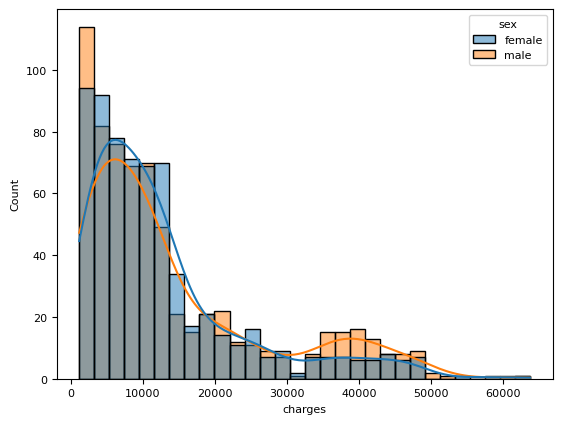

In [18]:
sns.histplot(data=data, x="charges", hue="sex", kde = True);
plt.show()

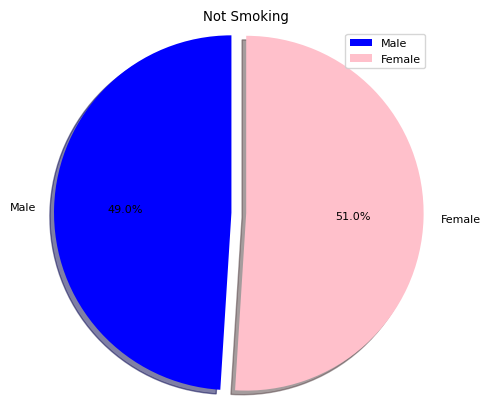

In [19]:
# Pie chart for non-Smoker counts according to male and female
Gender = ["Male", "Female"]
a = data[(data.sex == "male") & (data.smoker == "no")]["sex"]
b = data[(data.sex == "female") & (data.smoker == "no")]["sex"]
cnt = [a.count(), b.count()]

#a = 49%
#b = 51%


activities = ['Male' , 'Female']
# portion covered by each label
slices = [49, 51]
  
# color for each label
colors = ['blue', 'pink']
  
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
        startangle=90, shadow = True, explode = (0.1, 0),
        radius = 1.2, autopct = '%1.1f%%')
plt.title('Not Smoking')

plt.legend()
  
plt.show()


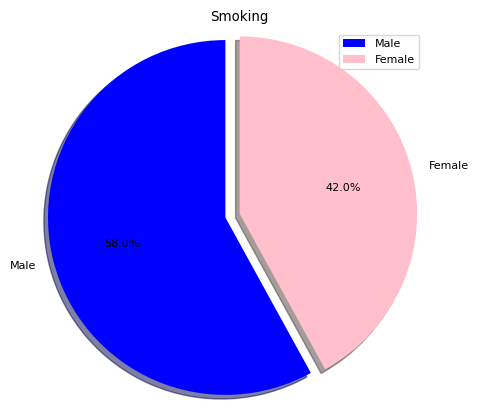

In [20]:
# Pie chart for Smoker counts according to male and female
Gender = ["Male", "Female"]
a = data[(data.sex == "male") & (data.smoker == "yes")]["sex"]
b = data[(data.sex == "female") & (data.smoker == "yes")]["sex"]
cmt = [a.count(), b.count()]

#a = 58%
#b = 42%

activities = ['Male' , 'Female']
# portion covered by each label
slices = [58, 42]
  
# color for each label
colors = ['blue', 'pink']
  
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors, 
        startangle=90, shadow = True, explode = (0.1, 0),
        radius = 1.2, autopct = '%1.1f%%')

plt.title('Smoking')
plt.legend()
plt.show()

In [21]:
b_init = 0
w_init = np.array([ 5, 6, 7, 4, 3])

#converting values of sex and smoker to int instead of strings
data['sex'] = data.sex.map({'male':0, 'female':1})
data['smoker'] = data.smoker.map({'yes':0, 'no':1})

#Choosing useful data , Ignoring region feature
x_vec = data.loc[:,['age','sex','bmi','children' ,'smoker']]
y_vec = y

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_vec, y_vec, test_size=0.1,random_state=0)


In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)
# regression coefficients
print('Weights: ', reg.coef_)
print('Bias: ', reg.intercept_)

Weights:  [   254.95994901     48.63525203    307.26697502    456.07421177
 -23482.69847884]
Bias:  11944.979350210026


In [24]:
# variance score: 1 means perfect prediction
print('Score: {}'.format(reg.score(X_test, y_test)))
print("Accuracy: " , reg.score(X_test,y_test)*100 ,'%')


Score: 0.8223733995140988
Accuracy:  82.23733995140988 %


In [25]:
#Different Model Evaluations
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_test)
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 :  0.8223733995140988
MAE : 4261.680502662962
RMSE: 5868.7656210291025
